<a href="https://colab.research.google.com/github/JoHeiberg/greenbox/blob/master/Portfolio_Tuesday_Jonas_Heiberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Tuesday

We will be using the turnover dataset 

https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv'

for this portfolio to do 3 things:

## Unsupervised ML

- Prepare the dataset (select the columns that are useful)
- Preprocess (Scale)
- Reduce dimensionality and perhaps make a scatterplot of the data
- Examine the reduced data

## Supervised ML

- Preprocess the data
- Try to predict "churn" using a simple model (Logistic Regression)
- Try a more advanced model (e.g. Random Forest)
- Evaluate your model
- Predict "satisfaction" (!!! This is a regression model)
- Evaluate the regression model



In [0]:
# churn - left company within the last 3 months

In [0]:
import pandas as pd

In [0]:
turnover = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')

In [0]:
turnover.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [0]:
!pip install -qq -U matplotlib
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah

In [0]:
turnover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Preprocessing

In [0]:
# Using classifier algorithms python will know that 1, 2,3 will be classifications and not numbers
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [0]:
# Transform labels into indices by passing y to the encoder
turnover['salary_enc'] = encoder.fit_transform(turnover.salary)

In [0]:
turnover.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary,salary_enc
0,0.380,0.530,2,157,3,0,1,0,sales,low,1
1,0.800,0.860,5,262,6,0,1,0,sales,medium,2
2,0.110,0.880,7,272,4,0,1,0,sales,medium,2
3,0.720,0.870,5,223,5,0,1,0,sales,low,1
4,0.370,0.520,2,159,3,0,1,0,sales,low,1


In [0]:
department_dummies = pd.get_dummies(turnover.department)

In [0]:
turnover = pd.concat([turnover, department_dummies], axis = 1)

In [0]:
turnover_all = turnover

In [0]:
turnover = turnover.drop(['churn'], axis= 1)

In [0]:
turnover = turnover.drop(['department'], axis= 1)

In [0]:
salary_mapper = {'low':1, 'medium':2, 'high':3}

In [0]:
turnover['salary_enc'] = turnover.salary.map(salary_mapper)
turnover = turnover.drop(['salary'], axis= 1)

In [0]:
turnover.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary_enc,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.380,0.530,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.800,0.860,5,262,6,0,0,2,0,0,0,0,0,0,0,1,0,0
2,0.110,0.880,7,272,4,0,0,2,0,0,0,0,0,0,0,1,0,0
3,0.720,0.870,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.370,0.520,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0


## Scaling

In [0]:
# We should scale our variables before changing the ordinal variables
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# Apply the scaler to our X-features
# scaler receives a pandas DataFrame but spits out a Numpy Array - which is much better to be used in the model # fit is to fit a model, transformation will be applied to our model
turnover_scaled = scaler.fit_transform(turnover)

## PCA

In [0]:
# Import the module and instantiate a PCA object
from sklearn.decomposition import PCA
model = PCA(n_components=15) #We pick 15 as the number of components...just because (it's a 3rd of the columns available)

# Fit and transform the data
data_reduced = model.fit_transform(turnover_scaled)

In [0]:
# Make sure the data shape is as it should be
data_reduced.shape

(14999, 15)

In [0]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()

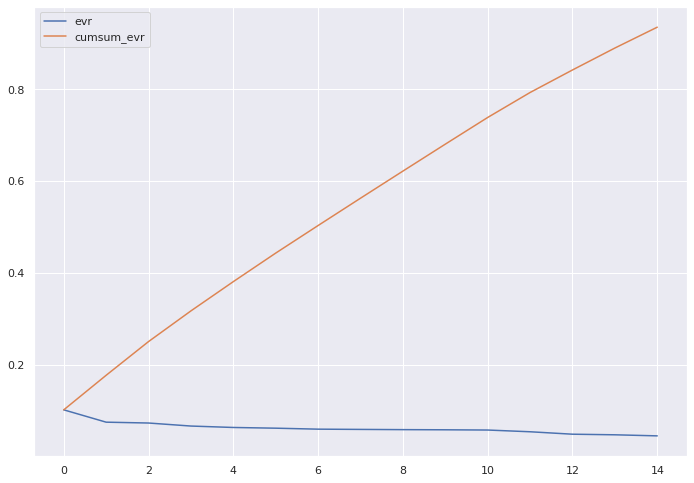

In [0]:
# Is 7 components really a good choice?
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [0]:
# How mach "information" do we kick out?
model.explained_variance_ratio_.sum()

0.9346204064040713

In [0]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=turnover.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

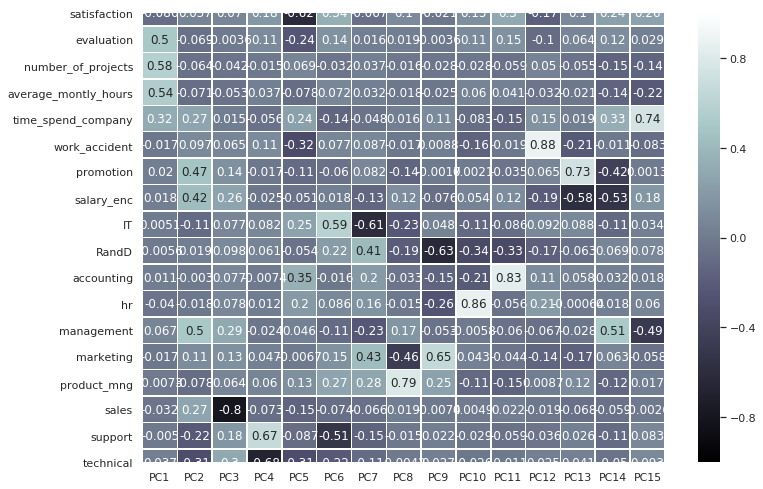

In [0]:
## fragile state and press freedom index explain most of the variance in the data
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

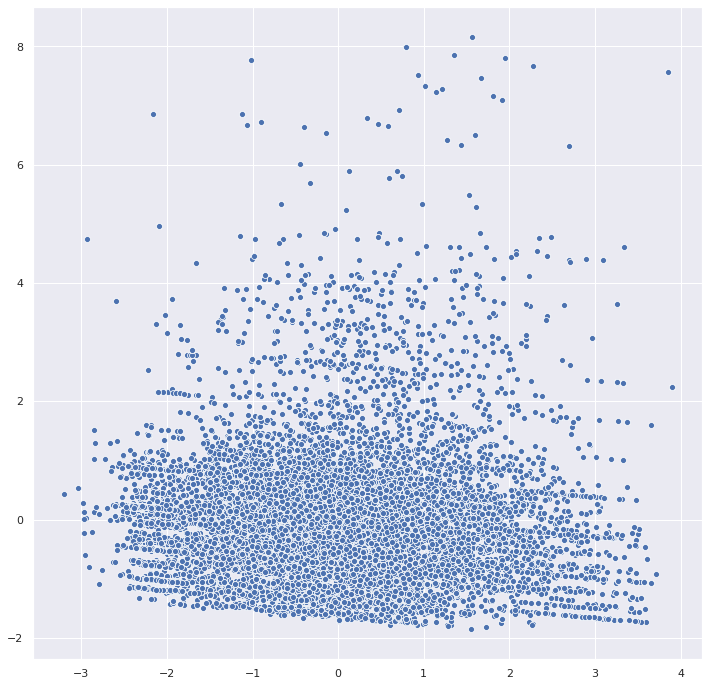

In [0]:
# Now we can plot in our points
plt.figure(figsize=(12,12))
g = sns.scatterplot(data_reduced[:,0], data_reduced[:,1],
                    legend='full', palette='viridis')

legend = g.get_legend()

## Supervised Mashine Learning 

In [0]:
# DO this to have nice heatmaps later using the updated matplotlib
!pip uninstall -qq matplotlib
!pip install -qq -U matplotlib

Proceed (y/n)? y
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt


sns.set(rc={'figure.figsize':(10,10)}) #plots should be a little bit larger

In [0]:
turnover_all = turnover_all.drop(['department'], axis= 1)

In [0]:
turnover_all

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,salary_enc,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.380,0.530,2,157,3,0,1,0,low,1,0,0,0,0,0,0,0,1,0,0
1,0.800,0.860,5,262,6,0,1,0,medium,2,0,0,0,0,0,0,0,1,0,0
2,0.110,0.880,7,272,4,0,1,0,medium,2,0,0,0,0,0,0,0,1,0,0
3,0.720,0.870,5,223,5,0,1,0,low,1,0,0,0,0,0,0,0,1,0,0
4,0.370,0.520,2,159,3,0,1,0,low,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.400,0.570,2,151,3,0,1,0,low,1,0,0,0,0,0,0,0,0,1,0
14995,0.370,0.480,2,160,3,0,1,0,low,1,0,0,0,0,0,0,0,0,1,0
14996,0.370,0.530,2,143,3,0,1,0,low,1,0,0,0,0,0,0,0,0,1,0
14997,0.110,0.960,6,280,4,0,1,0,low,1,0,0,0,0,0,0,0,0,1,0


In [0]:
turnover_all['salary_enc'] = turnover_all.salary.map(salary_mapper)



In [0]:
turnover_all = turnover_all.drop(['salary'], axis= 1)

In [0]:
turnover_all

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary_enc,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.380,0.530,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.800,0.860,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.110,0.880,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.720,0.870,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.370,0.520,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.400,0.570,2,151,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14995,0.370,0.480,2,160,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14996,0.370,0.530,2,143,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14997,0.110,0.960,6,280,4,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [0]:
y = turnover_all['churn']

In [0]:
turnover_new = turnover_all

In [0]:
# let's use everything we know about the cities to predict on which continent the city is  - predict 'region'
# Select the (independant) features that we are going to use to train the model, 
X = turnover_all.drop(['churn'], axis= 1)

In [0]:
y.unique()

array([1, 0])

In [0]:
# Using classifier algorithms python will know that 1, 2,3 will be classifications and not numbers
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [0]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [0]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# Apply the scaler to our X-features
# scaler receives a pandas DataFrame but spits out a Numpy Array - which is much better to be used in the model
X_scaled = scaler.fit_transform(X)

In [0]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility
# test_size --> share of data you use for test
# random_state: some random number to make process reprocible (randomize)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 42)

In [0]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

In [0]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Usually you would need to change some parameters here too, but here we will only look at the accuracy - how many of the outputs were in the right category
# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training, model is always newly calculated 
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.78916667 0.795      0.79416667 0.8025     0.78449354]
0.7886666666666666


In [0]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report
# recall is accuracy (percentage of correct interpretation)
# precision shows what? 

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.58      0.35      0.44       706

    accuracy                           0.79      3000
   macro avg       0.70      0.64      0.65      3000
weighted avg       0.77      0.79      0.77      3000



In [0]:
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend

In [0]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6016d08240>)

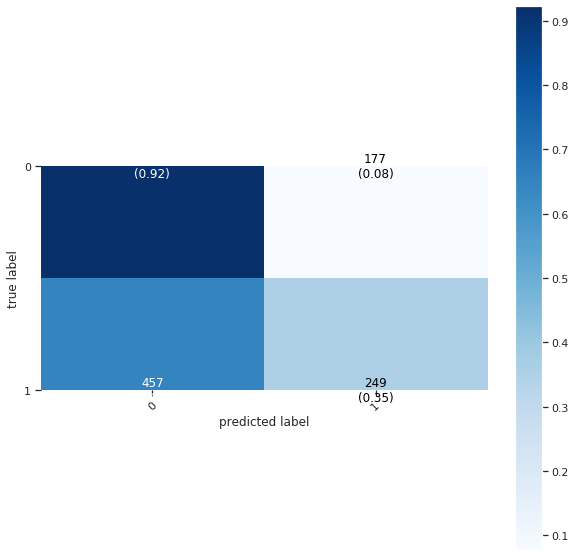

In [0]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names = target_names)

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.98583333 0.9875     0.98625    0.98958333 0.98666111]
0.9873333333333333


In [0]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f601a9225f8>)

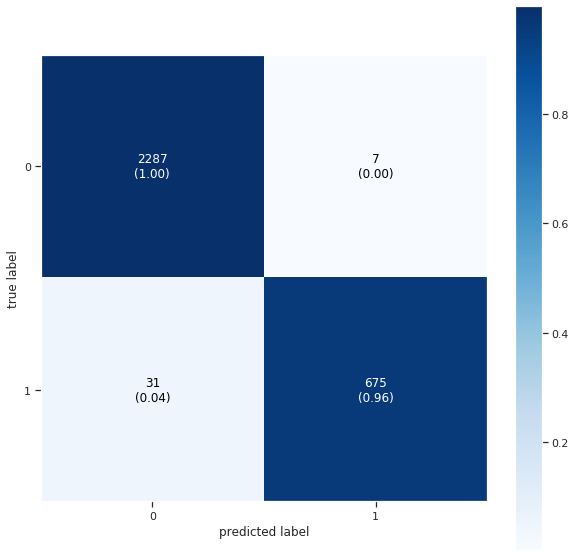

In [0]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

In [0]:
# picking a different outcome variable - satisfaction , does not need scaling, is outcome varible

y_reg = turnover_all.satisfaction

In [0]:
x = turnover_all.drop(['satisfaction'], axis= 1)

In [0]:
data = turnover_all

In [0]:
x

,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary_enc,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.530,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.860,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.880,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.870,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.520,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.570,2,151,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14995,0.480,2,160,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14996,0.530,2,143,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14997,0.960,6,280,4,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [0]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# Apply the scaler to our X-features
# scaler receives a pandas DataFrame but spits out a Numpy Array - which is much better to be used in the model
X_scaled = scaler.fit_transform(x)

In [0]:
# We need to creat new train / test splits here - as the nomad_score was not part of the previous split.

X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_reg, data, test_size = 0.2, random_state = 42)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
salary_enc              14999 non-null int64
IT                      14999 non-null uint8
RandD                   14999 non-null uint8
accounting              14999 non-null uint8
hr                      14999 non-null uint8
management              14999 non-null uint8
marketing               14999 non-null uint8
product_mng             14999 non-null uint8
sales                   14999 non-null uint8
support                 14999 non-null uint8
technical               14999 non-null uint8
dtypes: float64(2), int64(7), ui

In [0]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

0.18243739731539088


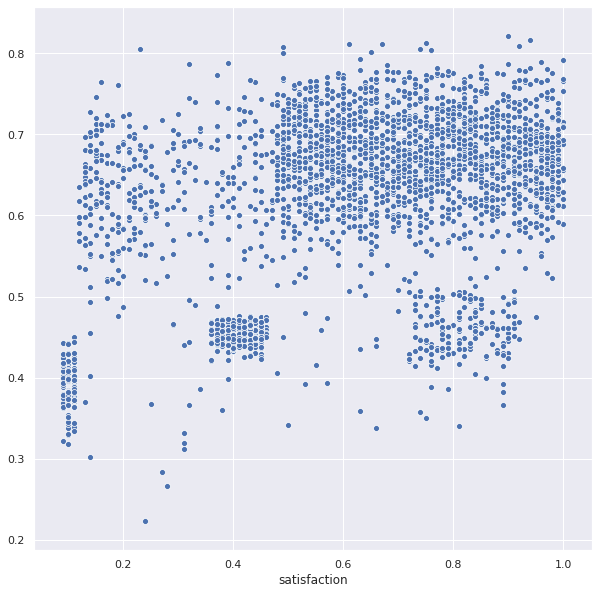

In [0]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)